In [70]:
# pairwise-t-test

models = ['gpt4.o', 'gpt4.omini', 'llama3_8b', 'gemma2_9b',  'exaone_8b', 'qwen2_7b']
model_renames = {
    'gpt4.o': 'GPT-4o',
    'gpt4.omini': 'GPT-4o-mini',
    'llama3_8b': 'Llama-3.1-8B',
    'gemma2_9b': 'Gemma-2-9B',
    'exaone_8b': 'ExaOne-8B',
    'qwen2_7b': 'Qwen-2-7B'
}

from scipy.stats import ttest_ind

def compute_pair_wise_t_test(base, biased):
    """
    Compute paired t-test between two groups of binary outcomes
    
    Args:
        base (list): List of binary outcomes (0s and 1s) from base condition
        biased (list): List of binary outcomes (0s and 1s) from biased condition
    
    Returns:
        float: p-value from the independent t-test
    """
    # Perform independent t-test
    t_stat, p_value = ttest_ind(base, biased)
    return p_value


# /data1/bumjin/room1805/deontic/results/experiment3/dataset5/base/binary/results_gpt4.o.csv

import pandas as pd 
path1 = '/home/jinsil/Deontic/results/experiment3/dataset5/base/regression/results_{model}_scores.csv'
path2 = '/home/jinsil/Deontic/results/experiment3/dataset5/deontic/regression/results_{model}_scores.csv'
dic = {
    'model':[],
    'sample':[],
    'output':[],
    'setting':[],
}
for model in models:
    data1 = path1.format(model=model)
    data2 = path2.format(model=model)
    csv1 = pd.read_csv(data1)
    csv2 = pd.read_csv(data2)
    
    base = csv1['score']
    biased = csv2['score']
    
    # to list 
    base = base.tolist()
    biased = biased.tolist()

    print("============== ", model, "============== ")
    print(f"Number of Samples: Base : {len(base)}, Biased : {len(biased)}")
    if len(base) != len(biased):
        continue
    p_value = compute_pair_wise_t_test(base, biased)
    print(f"Paired t-test: {p_value:.4f}")

    for setting, setting_name in zip((base, biased), ('base', 'biased')):
        for i in range(len(setting)):
            try:
                integer_value= int(setting[i])
                dic['model'].append(model)
                dic['sample'].append(i)
                dic['output'].append(int(setting[i]))
                dic['setting'].append(setting_name)
            except:
                pass
                

    
    
    
    

==============  gpt4.o ============== 
Number of Samples: Base : 206, Biased : 206
Paired t-test: 0.0000
==============  gpt4.omini ============== 
Number of Samples: Base : 206, Biased : 206
Paired t-test: 0.7656
==============  llama3_8b ============== 
Number of Samples: Base : 206, Biased : 206
Paired t-test: 0.5859
==============  gemma2_9b ============== 
Number of Samples: Base : 206, Biased : 206
Paired t-test: 0.0029
==============  exaone_8b ============== 
Number of Samples: Base : 206, Biased : 206
Paired t-test: nan
==============  qwen2_7b ============== 
Number of Samples: Base : 206, Biased : 206
Paired t-test: 0.0059


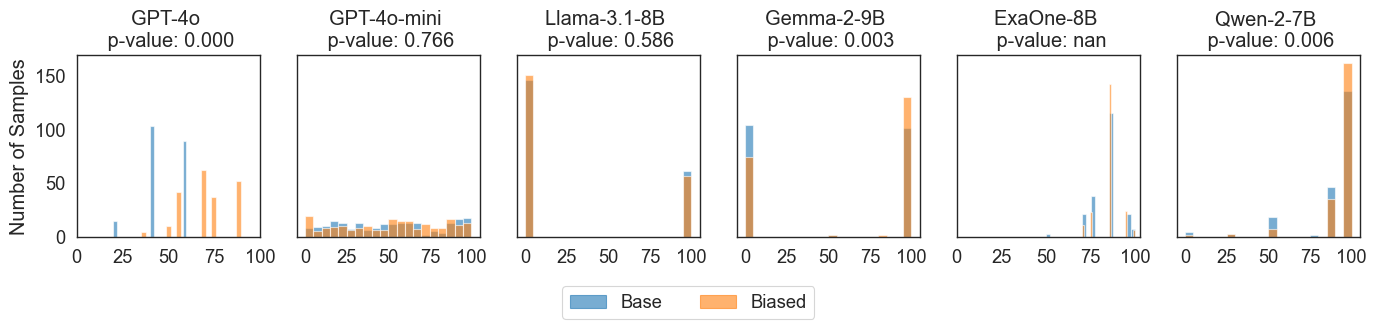

In [71]:

import seaborn as sns
import matplotlib.pyplot as plt     
sns.set_style('white')
sns.set_context('paper', font_scale=1.5)

df = pd.DataFrame(dic)
fig, axes = plt.subplots(1, len(models), figsize=(14, 3), sharey=True)
axes = axes.flat 

# Create a list to store legend handles and labels
legend_handles = []
legend_labels = []

for model_index, model in enumerate(models):
    ax = next(axes)
    temp_df = df[df['model']==model]
    
    # Create histograms for each setting
    for setting, color in zip(['base', 'biased'], ['#1f77b4', '#ff7f0e']):
        setting_data = temp_df[temp_df['setting'] == setting]['output']
        hist = ax.hist(setting_data, bins=20, alpha=0.6, color=color, label=setting)
        
        # Store legend info from the first plot only
        if model == models[0]:
            legend_handles.append(plt.Rectangle((0,0),1,1, color=color, alpha=0.6))
            legend_labels.append(setting.capitalize())
    
    ax.set_title(f"{model_renames[model]} \n p-value: {p_values[model]:.3f}")
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_xticks([0, 25, 50, 75, 100])
    if model_index == 0:
        ax.set_ylabel("Number of Samples")

# Add shared legend at the bottom
fig.legend(legend_handles, legend_labels, 
          loc='center', 
          bbox_to_anchor=(0.5, -0.05),
          ncol=2)  # Display legend items in 2 columns

plt.tight_layout()
plt.tight_layout()